![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [52]:
# Start your code here!
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import pingouin
alpha = 0.1

In [53]:
# 1
df_women = pd.read_csv("women_results.csv")
#print(df_women.columns)
print(df_women.head(10))
df_men = pd.read_csv("men_results.csv")
#print(df_men.columns)


   Unnamed: 0        date  ... away_score        tournament
0           0  1969-11-01  ...          0              Euro
1           1  1969-11-01  ...          3              Euro
2           2  1969-11-02  ...          0              Euro
3           3  1969-11-02  ...          1              Euro
4           4  1975-08-25  ...          2  AFC Championship
5           5  1975-08-25  ...          2  AFC Championship
6           6  1975-08-27  ...          0  AFC Championship
7           7  1975-08-27  ...          0  AFC Championship
8           8  1975-08-29  ...          0  AFC Championship
9           9  1975-08-29  ...          2  AFC Championship

[10 rows x 7 columns]


In [54]:
# 2 women
df_women['score_women'] = df_women['home_score'] + df_women['away_score']
#print(df_women.columns)
#print(df_women.head(10))
df_women = df_women[df_women["tournament"] == "FIFA World Cup"]
#print(df_women.head(20))
df_women = df_women[df_women["date"] > "2002-01-01"]
#print(df_women.head(10))
# 2 men
df_men['score_men'] = df_men['home_score'] + df_men['away_score']
#print(df_men.columns)
#print(df_men.head(5))
df_men = df_men[df_men["tournament"] == "FIFA World Cup"]
#print(df_men.head(20))
df_men = df_men[df_men["date"] > "2002-01-01"]
#print(df_men.head(10))
# combiner et mettre genre
df_all = pd.concat([df_women, df_men])
print(df_all.columns)
df_all['genre'] = np.where(pd.notna(df_all['score_men']), 'men', 'women')
df_all['score_men'].fillna(0, inplace=True)
df_all['score_women'].fillna(0, inplace=True)
df_all["score"] = df_all['score_men'] + df_all['score_women']
#df_all["genre"]=
print(df_all.head(220))

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'score_women', 'score_men'],
      dtype='object')
       Unnamed: 0        date      home_team  ... score_men  genre  score
1600         1600  2003-09-20        Nigeria  ...       0.0  women    3.0
1601         1601  2003-09-20         Norway  ...       0.0  women    2.0
1602         1602  2003-09-20        Germany  ...       0.0  women    5.0
1603         1603  2003-09-20          Japan  ...       0.0  women    6.0
1604         1604  2003-09-21  United States  ...       0.0  women    4.0
...           ...         ...            ...  ...       ...    ...    ...
25179       25179  2002-06-05         Russia  ...       2.0    men    2.0
25180       25180  2002-06-05  United States  ...       5.0    men    5.0
25181       25181  2002-06-06       Cameroon  ...       1.0    men    1.0
25182       25182  2002-06-06        Denmark  ...       2.0    men    2.0
25183       25183  2002-06-06  

In [55]:
score_genre = df_all[["score", "genre"]]
score_genre_wide = score_genre.pivot(columns ="genre", values="score")
print(score_genre_wide)
ping = pingouin.mwu(x=score_genre_wide["women"], y=score_genre_wide["men"], alternative = 'greater')
print(ping)
p_val = float(ping['p-val'].values)
print(p_val)

genre  men  women
1600   NaN    3.0
1601   NaN    2.0
1602   NaN    5.0
1603   NaN    6.0
1604   NaN    4.0
...    ...    ...
44343  3.0    NaN
44345  3.0    NaN
44346  2.0    NaN
44350  3.0    NaN
44352  6.0    NaN

[584 rows x 2 columns]
       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
0.005106609825443641


In [56]:
print(p_val)
if p_val > alpha :
    result = "fail to reject"
else :
    result = "reject"
print(result)
result_dict = {"p_val": p_val, "result": result}
print(result_dict)

0.005106609825443641
reject
{'p_val': 0.005106609825443641, 'result': 'reject'}


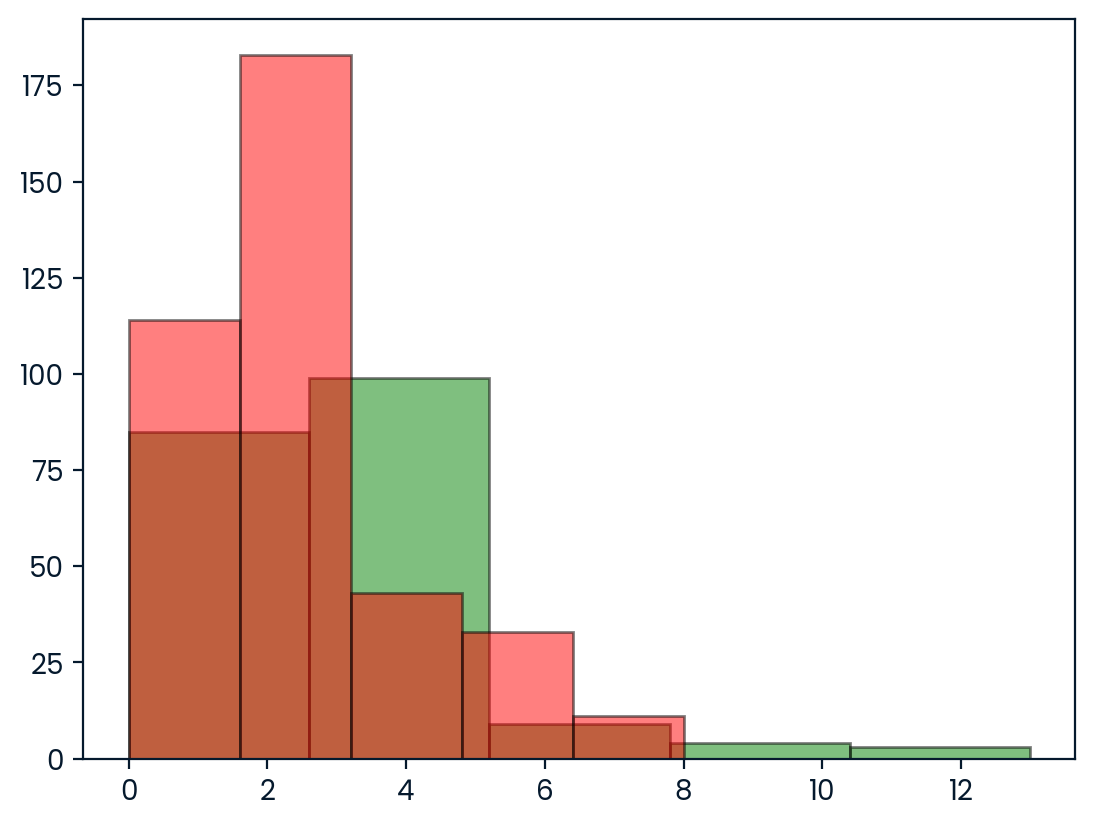

In [57]:
# deux échontillons indépendant : t-test ou z-score (paramétré ou distribution normale les deux) sinon mwu
plt.hist(df_women['score_women'], bins=5, alpha=0.5, label='Women', color='g', edgecolor='black')
plt.hist(df_men['score_men'], bins=5, alpha=0.5, label='Men', color='r', edgecolor='black')
plt.show()
# distribution pas normale : donc non paramétré alors c'est mwu
